<div style=" border-bottom: 8px solid #00B2FF; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 100%; background-color: #3800BB; float: left; text-align: center; display: flex; justify-content: left; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">Visualization: Model Errors</span></b>
  </div>
</div>

<div class="alert" style="background-color: #FEDAD5; border-left: 8px solid #B12111; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h5 style="font-size: 16px; margin-bottom: 10px;">
    <strong> Contents </strong>
  </h5>
<hr>
  <p><font size="3" face="Arial" font-size="large"><ul type="square">  
  <li> Feature Importance </li>
  <li> SHAP values </li>
  <li> classification report </li>
  <li> Confusion Matrix </li>
  <li> Regression and Error (Actual and Predicted difference) </li>
  <li> (True - Pred) vs (True + Pred) visual </li>
  <li> Conclusion </li>
  </li></ul></font></p>

</div>

<img src='../imgs/03.4.02_1.JPG' width="1000" height="300" />

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

Visualization can help even after we have **already trained** a model.  
For example: 
* Understand what adds noise to the model or what can be added to make model more precise.
* Draw conclusions about how accuracy can be improved in further experiments.
* Visualize model errors
* Eliminate unnecessary features
* Find ideas for new features.

It all depends on the type of the data

</div>

<div class="alert alert-warning">

### Import Packages and Overview Dataset
</div>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
import numpy as np
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from classes import Paths


import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Now you can import the utils module
from utils import *

In [2]:
paths = Paths()
path = paths.quickstart_train
df = pd.read_csv(path)
display(df.shape)
display(df.dtypes)
df.head(10)



(2337, 17)

car_id                       object
model                        object
car_type                     object
fuel_type                    object
car_rating                  float64
year_to_start                 int64
riders                        int64
year_to_work                  int64
target_reg                  float64
target_class                 object
mean_rating                 float64
distance_sum                float64
rating_min                  float64
speed_max                   float64
user_ride_quality_median    float64
deviation_normal_count        int64
user_uniq                     int64
dtype: object

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,4.74,"12,141,310.41",0.10,180.86,0.02,174,170
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,34.48,electro_bug,4.48,"18,039,092.84",0.00,187.86,12.31,174,174
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,34.93,gear_stick,4.77,"15,883,659.43",0.10,102.38,2.51,174,173
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,32.22,engine_fuel,3.88,"16,518,828.77",0.10,172.79,-5.03,174,170
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,27.51,engine_fuel,4.18,"13,983,174.66",0.10,203.46,-14.26,174,171
5,b12101843B,Skoda Rapid,economy,petrol,2.36,2013,42176,2018,48.99,engine_ignition,4.35,"10,855,890.99",0.10,180.89,-18.22,174,173
6,Q-9368117S,Nissan Qashqai,standart,petrol,5.32,2012,24611,2014,54.72,engine_overheat,4.39,"8,343,280.33",0.10,174.98,12.32,174,167
7,O-2124190y,Tesla Model 3,premium,electro,3.90,2017,116872,2019,50.40,gear_stick,4.71,"9,793,288.03",0.10,95.89,-8.94,174,139
8,h16895544p,Kia Sportage,standart,petrol,3.50,2014,56384,2017,33.59,gear_stick,4.51,"16,444,046.89",0.32,101.80,-1.16,174,170
9,K77009462l,Smart ForFour,economy,petrol,4.56,2013,41309,2018,39.04,gear_stick,4.38,"6,975,742.48",0.10,125.25,3.77,174,173


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq,random_feature_1,random_feature_2,random_feature_3
81,h20080273C,Kia Rio,economy,petrol,3.44,2013,47064,2020,30.63,wheel_shake,4.37,"8,652,657.22",0.10,131.87,-2.82,174,172,0.43,-0.62,50
1021,f22138231E,Nissan Qashqai,standart,petrol,2.34,2014,55624,2016,66.01,engine_check,4.57,"5,446,858.81",0.10,174.62,12.76,174,171,0.19,-1.31,72
1446,V12462480t,Smart Coupe,economy,petrol,3.76,2016,102285,2021,47.00,engine_check,4.75,"13,607,928.98",0.10,162.00,-8.25,174,172,0.17,-0.72,98
1587,L-2259780s,Skoda Rapid,economy,petrol,4.46,2017,126002,2019,26.75,gear_stick,4.39,"12,394,998.05",0.91,106.42,-7.71,174,174,0.29,0.19,63
2127,z30508487R,Renault Sandero,standart,petrol,5.12,2014,63057,2019,38.39,break_bug,5.51,"13,331,372.73",0.91,116.54,0.19,174,174,0.85,-1.36,57


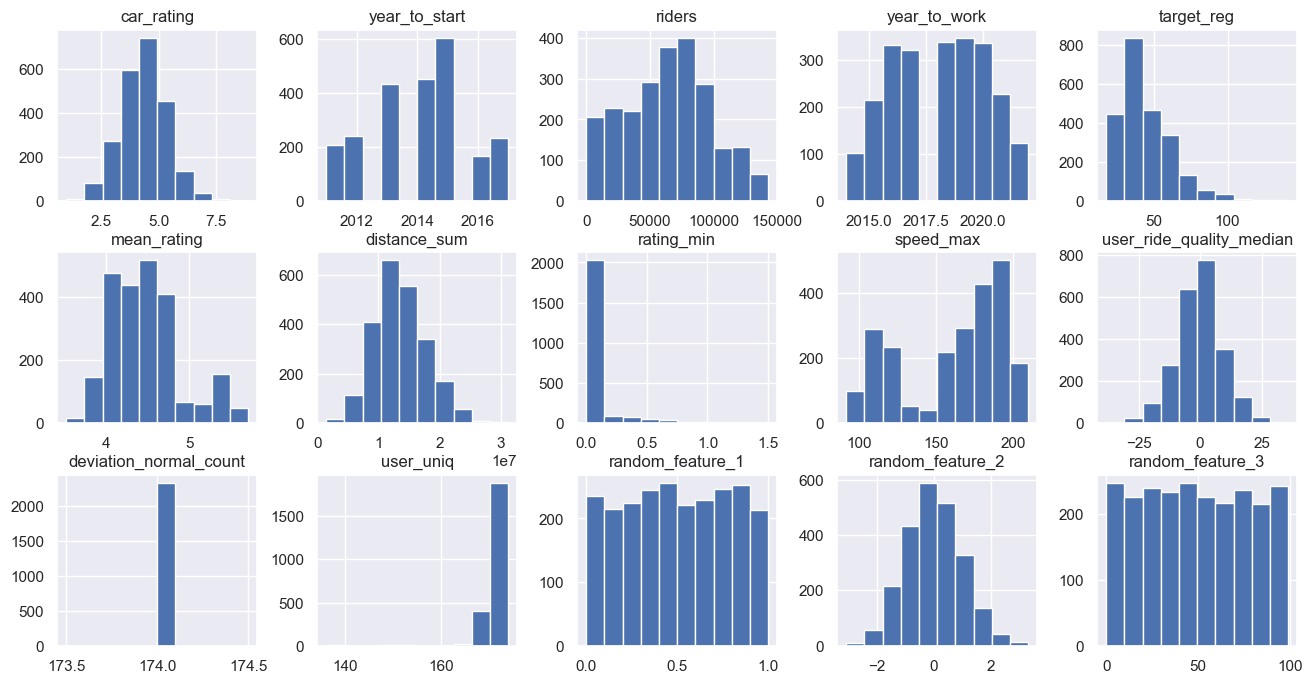

In [6]:
df['random_feature_1'] = np.random.random(size=df.shape[0])
df['random_feature_2'] = np.random.normal(size=df.shape[0])
df['random_feature_3'] = np.random.randint(100, size=df.shape[0])

df.hist(figsize=(16, 8)
        , layout=(-1, 5))
df.sample(5)

In [7]:
from sklearn.model_selection import train_test_split

drop_cols = ['user_id', 'car_id', 'ride_id', 'ride_date']
cat_cols = ['car_type', 'fuel_type', 'model']

y = df['target_class']
X = df.drop(columns=drop_cols + ['target_class', 'target_reg']
            , axis=1
            , errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , test_size=0.2
                                                    , random_state=42)

<div class="alert alert-warning">

### Classification
</div>

In [8]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

clf = CatBoostClassifier(
    random_seed=9
  , thread_count=-1
  , use_best_model=True
  , cat_features=cat_cols
  , colsample_bylevel=0.1
  , subsample=0.95
  , bootstrap_type='Bernoulli'
)

clf.fit(
    X_train
    , y_train
    , eval_set=(X_test, y_test)
    , verbose=250
    , plot=False
    , early_stopping_rounds=100
)

print(clf.get_best_score())

Learning rate set to 0.109335
0:	learn: 2.0415376	test: 2.0431216	best: 2.0431216 (0)	total: 61.2ms	remaining: 1m 1s
250:	learn: 0.3391178	test: 0.5469105	best: 0.5451231 (233)	total: 537ms	remaining: 1.6s
500:	learn: 0.2185066	test: 0.5305776	best: 0.5295310 (441)	total: 1.01s	remaining: 1.01s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.527328808
bestIteration = 527

Shrink model to first 528 iterations.
{'learn': {'MultiClass': 0.17790869984879257}, 'validation': {'MultiClass': 0.527328808003585}}
